In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/net/fs11/d0/emfreese/social_cost_carbon/tsd_2021_all_mc_runs.csv', header = [0,1,2,3,4], index_col = 0)
df = df.transpose()  #data is in 2007$/metric ton
df = df.droplevel(['Model','Scenario']).xs('2020')

#### read in emissions data ####
gmodel_egrid = xr.open_zarr(f'./data/gmodel_egrid_emissions_ds.zarr')


In [3]:
#### CO2 values ####
normal_CO2 = ((gmodel_egrid.sel(model_name = 'normal_model')['PLCO2RTA']*gmodel_egrid.sel(model_name = 'normal_model')['annual_modelgeneration']).sum()*.001).values #metric tons
nonuc_CO2 = ((gmodel_egrid.sel(model_name = 'nonuc_model')['PLCO2RTA']*gmodel_egrid.sel(model_name = 'nonuc_model')['annual_modelgeneration']).sum()*.001).values #metric tons
dif_CO2 = nonuc_CO2 - normal_CO2

In [4]:
#### datasets for normal and no nuclear cost of CO2 emissions ####
df_nonuc = (df*nonuc_CO2)
df_normal = (df*normal_CO2)
df_dif = (df*dif_CO2)

/tmp/ipykernel_3425728/2610111490.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  x = df_dif.loc[(scc, 'CO2')].values.flatten()*1e-9 #drop the levels for model, scenario type, choose 2010 levels
/tmp/ipykernel_3425728/2610111490.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_3425728/2610111490.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('Figures/scc.png', dpi = 150, bbox_inches = 'tight')
/home/emfreese/anaconda3/envs/grid_mod/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


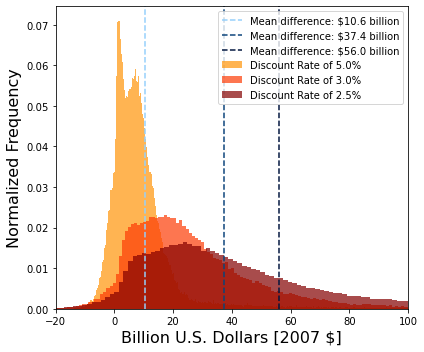

In [5]:
#### plot our SCC by discount rate ####
colors = ["tangerine","red orange",'dark red']
colors_mean = ["light blue","twilight blue",'navy']
bin_vals = [100.,1000.]
fig, axes = plt.subplots(1,1, figsize=[6,5],)
for idx_c, scc in enumerate(['5.0%','3.0%','2.5%']):
    x = df_dif.loc[(scc, 'CO2')].values.flatten()*1e-9 #drop the levels for model, scenario type, choose 2010 levels
    mean = x.mean()
    n, bins, patches = plt.hist(x=x, bins='auto', color=sns.xkcd_palette(colors)[idx_c],label = f'Discount Rate of {scc}',
                            alpha=0.7, density = True)
    plt.axvline(mean, color=sns.xkcd_palette(colors_mean)[idx_c], linestyle='--', label = f'Mean difference: ${np.round(mean,1)} billion')
    plt.legend()
    #plt.title(f'Monetized Social Impact', fontsize = 20)
    plt.xlabel('Billion U.S. Dollars [2007 $]', fontsize = 16)
    plt.ylabel('Normalized Frequency', fontsize = 16)
    plt.xlim(-20,100)
plt.tight_layout()
plt.savefig('Figures/scc.png', dpi = 150, bbox_inches = 'tight')

## Mortality Cost Carbon

In [11]:
d = {'baseline': [-1.71e-4, 2.26e-4, 6.78e-4], 'optimal': [-2.16e-4, 1.07e-4, 5.22e-4]}
df_MCC = pd.DataFrame(data=d, index=pd.Index(['low', 'central','high']))
df_MCC


,baseline,optimal
low,-0.000171,-0.000216
central,0.000226,0.000107
high,0.000678,0.000522


In [12]:
dif_CO2*df_MCC

,baseline,optimal
low,-125220.683842,-158173.495379
central,165496.342387,78354.462989
high,496489.027162,382252.613833
